### Multilabel Classification Training and Testing Data Preperation

***
This Notebook is to generate training and testing set for **few shot learner**.   

For multilabel classification, the final dataframe includes categoties, texts and labels. Topics are grouped based on a category topics mapping generated from the 'cat-mapping.txt' extracted from 'cat-descriptions_120396.txt'.  

For few shot learner, the final dataframe is in the 'Commodity' category. In training set, for each topics, I will sample 10 to 50 datapoints.   
***
- Data Preprocessing
- Generate Topics and Categories Mapping
- Construct Category and Label
- Data Visualization
    - category distribution
    - topic distribution

In [8]:
import numpy as np
import pandas as pd

import json

In [6]:
# read data
reuters_bert_train = pd.read_csv('result/reuters_final_train.csv')
reuters_bert_test = pd.read_csv('result/reuters_final_test.csv')

reuters_bert_train.head()

,id,topics,texts
0,4005,interest,u.s. economic data key to debt futures outlook...
1,4005,retail,u.s. economic data key to debt futures outlook...
2,4005,ipi,u.s. economic data key to debt futures outlook...
3,4012,earn,bank of british columbia 1st qtr jan 31 netope...
4,4014,earn,restaurant associates inc <ra> 4th qtr jan 3sh...


In [13]:
## Read mapping data
with open('result/category_topic_mapping.json',"r") as f:
    mapping = json.load(f)


In [19]:
mapping.keys()

dict_keys(['money-fx', 'ship', 'interest', 'economic_indicator', 'currency', 'commodity', 'energy', 'acq', 'earn'])

In [16]:
def add_single_category(cat_top_map, topic):
    for key in cat_top_map:
        if topic in cat_top_map[key]:
            return key

In [73]:
def get_fewshot_data(df,category ='commodity',num=50):
    # add category
    df['category'] = df['topics'].apply(lambda x: add_single_category(mapping, x))
    
    # choose specific category and resample
    df = df[df['category'] == category].groupby('topics').head(num)
    
    # topics with one record
    temp = df.groupby('topics').count()
    topics = temp[temp['id']<10].index.tolist()
    
    # exclude topics with less then 10 records
    df = df[~df['topics'].isin(topics)]
    return df[['id','topics','texts']]

fewshot_train = get_fewshot_data(reuters_bert_train)


In [74]:
fewshot_train.to_csv('result/reuster_fewshot_train.csv',index=False)

In [75]:
print('The shape of training data is {}.'.format(fewshot_train.shape))
fewshot_train.head()

The shape of training data is (1143, 3).


,id,topics,texts
8,4016,iron-steel,"usx <x> proved oil, gas reserves fall in 1986u..."
11,4022,carcass,argentine meat exports higher in jan/feb 1987a...
12,4022,livestock,argentine meat exports higher in jan/feb 1987a...
22,4035,veg-oil,british minister criticises proposed ec oils t...
26,4040,oilseed,china's rapeseed crop damaged by stormsthe yie...


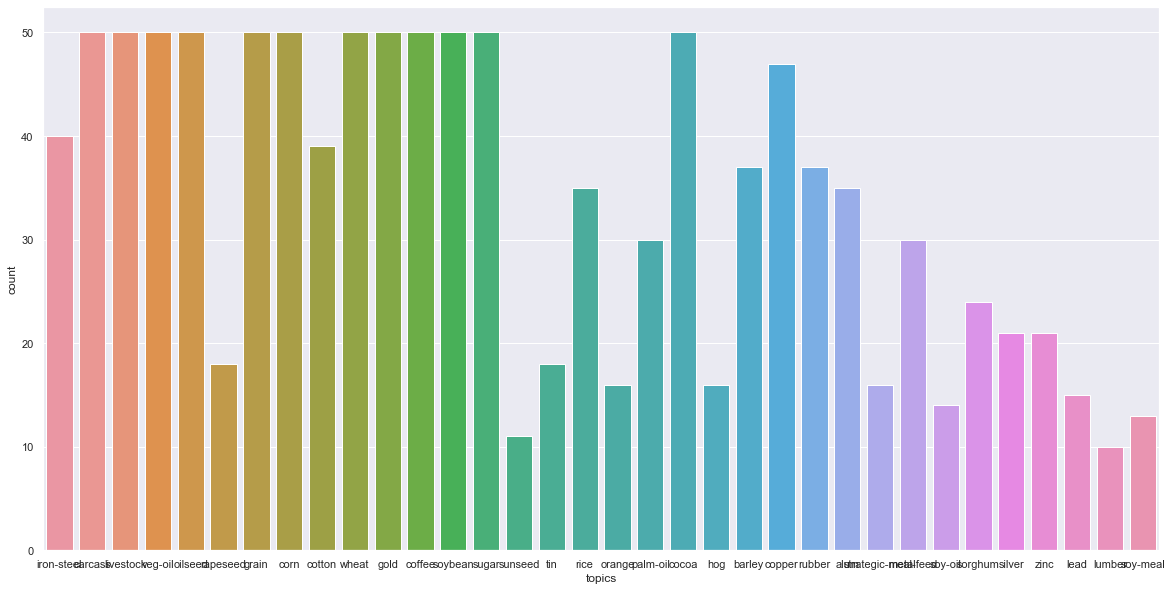

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="darkgrid")
# titanic = sns.load_dataset("commodity")
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(x="topics", data=fewshot_train)